# Read and plot delta files with picca format

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
#Open data file
hdulist = fits.open('../example_data/delta_picca/N1000_node_015_nside_4_pix_10.fits')
hdulist.info()

Filename: ../example_data/delta_picca/N1000_node_015_nside_4_pix_10.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (1000, 2002)   float32   
  1  IV          ImageHDU         8   (1000, 2002)   float64   
  2  LOGLAM_MAP  ImageHDU         7   (2002,)   float32   
  3  CATALOG     BinTableHDU     23   1000R x 7C   [E, E, E, E, E, E, 10A]   


In [4]:
# get information about quasars (RA,DEC,Z,PLATE,MJD,FIBER,THING_ID)
catalog = hdulist[3].data
Nq=len(catalog)
print('# quasars =',Nq)

# quasars = 1000


In [5]:
# get arraw with log(lambda) in each cell of grid
loglam = hdulist[2].data
Nll=len(loglam)
print('# cells in grid =',Nll)
print(10**(loglam[0]),'< lamba <',10**(loglam[-1]))

# cells in grid = 2002
1216.15673076 < lamba < 5568.96218756


In [6]:
# get weight for each pixel (inverse variance), for now set to 1
weights = hdulist[1].data
print(weights.shape)

(2002, 1000)


In [7]:
# get deltas for each pixel
deltas = hdulist[0].data
print(deltas.shape)

(2002, 1000)


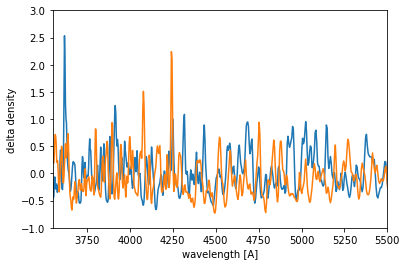

In [8]:
# plot a couple of delta skewers, for pixels in DESI spectrograph
plt.xlim(3550.0,5500.0)
plt.ylim(-1,3)
plt.xlabel('wavelength [A]')
plt.ylabel('delta density')
plt.plot(10**loglam,deltas[:,-1])
plt.plot(10**loglam,deltas[:,-2])